Q3
Fuel economy data are the result of vehicle testing done at the Environmental Protection
Agency's National Vehicle and Fuel Emissions Laboratory in Ann Arbor, Michigan, and by
vehicle manufacturers with oversight by EPA.
Datset Description:
 Model Vehicle make and model
 Displ Engine displacement - the size of an engine in liters
 Cyl The number of cylinders in a particular engine
 Trans Transmission Type and Number of Gears
 Drive Drive axle type (2WD = 2-wheel drive, 4WD = 4-wheel/all-wheel drive)
 Fuel Fuel Type
 Cert Region* Certification Region Code
 Sales Area** Certification Region Code
 Stnd Vehicle emissions standard
 Stnd Description* Vehicle emissions standard description
 Underhood ID This is a 12-digit ID number that can be found on the
underhood emission label of every vehicle. It's required by the EPA to
designate its "test group" or "engine family."
 Veh Class EPA Vehicle Class
 Air Pollution Score Air pollution score (smog rating)
 City MPG Estimated city mpg (miles/gallon)
 Hwy MPG Estimated highway mpg (miles/gallon)

 Cmb MPG Estimated combined mpg (miles/gallon)
 Greenhouse Gas Score Greenhouse gas rating
 SmartWay Yes, No, or Elite
 Comb CO2* Combined city/highway CO2 tailpipe emissions in grams per mile
Note: For more details information about the dataset refer to the text file

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

In [6]:
def take_digit(cyl):
    ans= re.findall('\d+', cyl)
    #print(ans)
    return ans

print(take_digit('(63 cyl)'))

['63']


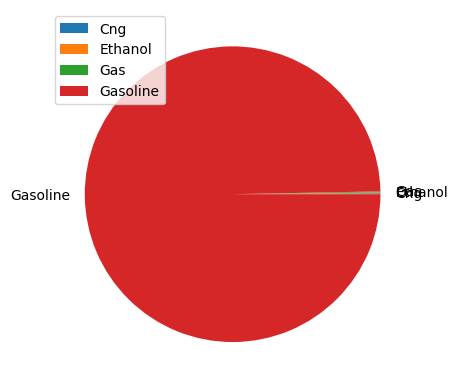

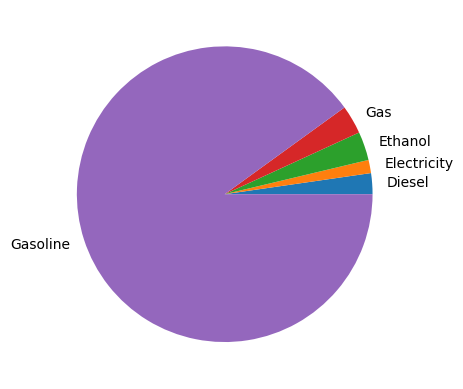

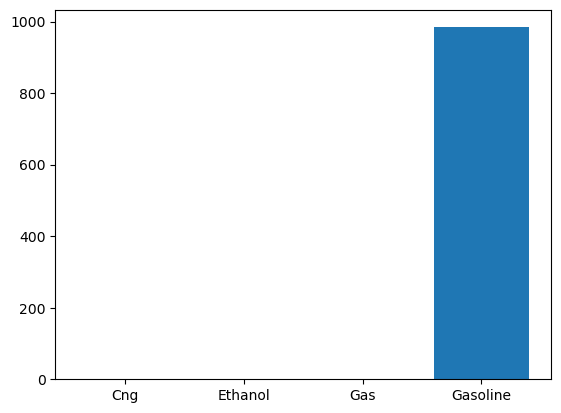

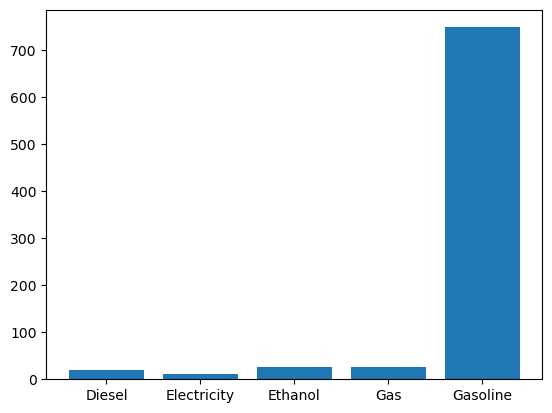

In [7]:
# df1= pd.read_csv('all_alpha_08.csv')
# df1['Year']=2008
# df2= pd.read_csv('all_alpha_18.csv')
# df2['Year']=2018

df1= pd.read_csv('clean_08.csv')
df1['Year']=2008
df2= pd.read_csv('clean_18.csv')
df2['Year']=2018

# df1.dropna(axis=0, inplace=True)
# df1['cyl']= df1['cyl'].apply(take_digit)

df1['fuel']=df1['fuel'].apply(lambda x: x.capitalize())
df2['fuel']=df2['fuel'].apply(lambda x: x.capitalize())
#df=pd.concat([df1,df2])

fuel_08=df1.groupby('fuel')['cyl'].count().sort_index()
fuel_18=df2.groupby('fuel')['cyl'].count().sort_index()




plt.pie(fuel_08, labels=fuel_08.index)
plt.legend()
plt.show()
plt.pie(fuel_18, labels=fuel_18.index)
plt.show()

plt.bar(height=fuel_08, x=fuel_08.index, label='2008')
plt.show()
plt.bar(height=fuel_18, x=fuel_18.index, label='2018')
plt.show()


# fuel_18.plot(kind='bar', label='2018')
# fuel_08.plot(kind='line', color='red', label='2008')
# plt.xticks(range(len(fuel_18.index)), fuel_18.index.values)
# plt.legend()
# plt.show()


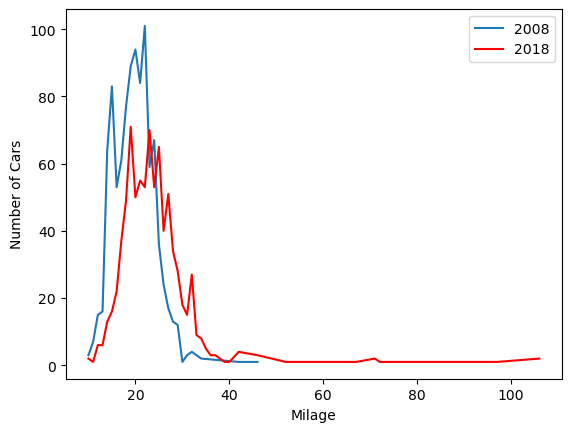

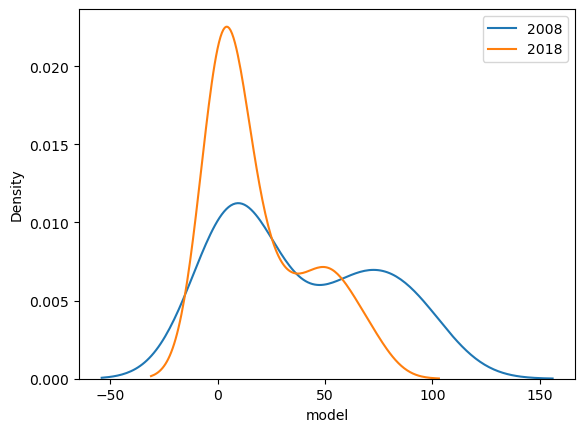

In [8]:
fuel_eco_08=df1.groupby(["cmb_mpg"])['model'].count()
fuel_eco_18=df2.groupby(["cmb_mpg"])['model'].count()

plt.plot(fuel_eco_08.index, fuel_eco_08,label="2008")
plt.plot(fuel_eco_18.index, fuel_eco_18,label="2018",color='red')
plt.xlabel('Milage')
plt.ylabel('Number of Cars')
plt.legend()
plt.show()
sns.kdeplot(fuel_eco_08,label="2008")

sns.kdeplot(fuel_eco_18,label="2018")
plt.legend()

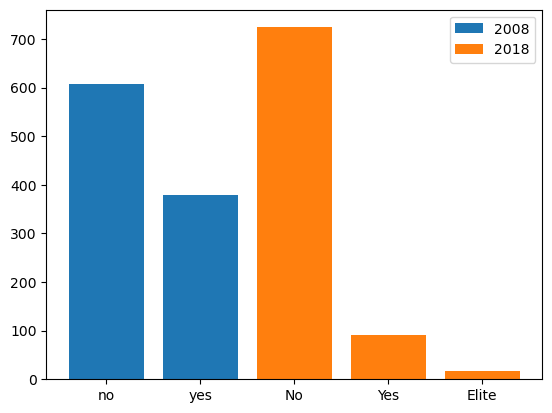

In [9]:
smartway08=df1['smartway'].value_counts()

smartway18=df2['smartway'].value_counts()

plt.bar(height=smartway08,x=smartway08.index,label="2008")
plt.bar(height=smartway18,x=smartway18.index,label="2018")
plt.legend()

Smartway vehicles have been reduced in 2018

In [10]:
corr = df1.corr()
print(corr)

                         displ       cyl  air_pollution_score  city_mpg  \
displ                 1.000000  0.899304            -0.289993 -0.790440   
cyl                   0.899304  1.000000            -0.270417 -0.756304   
air_pollution_score  -0.289993 -0.270417             1.000000  0.432434   
city_mpg             -0.790440 -0.756304             0.432434  1.000000   
hwy_mpg              -0.801678 -0.733064             0.400708  0.902942   
cmb_mpg              -0.818799 -0.770538             0.425784  0.980891   
greenhouse_gas_score -0.847613 -0.820940             0.388444  0.910693   
Year                       NaN       NaN                  NaN       NaN   

                       hwy_mpg   cmb_mpg  greenhouse_gas_score  Year  
displ                -0.801678 -0.818799             -0.847613   NaN  
cyl                  -0.733064 -0.770538             -0.820940   NaN  
air_pollution_score   0.400708  0.425784              0.388444   NaN  
city_mpg              0.902942  0.980891

/tmp/ipykernel_72135/2052879311.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df1.corr()


as green house gas score is increases milage increases as well

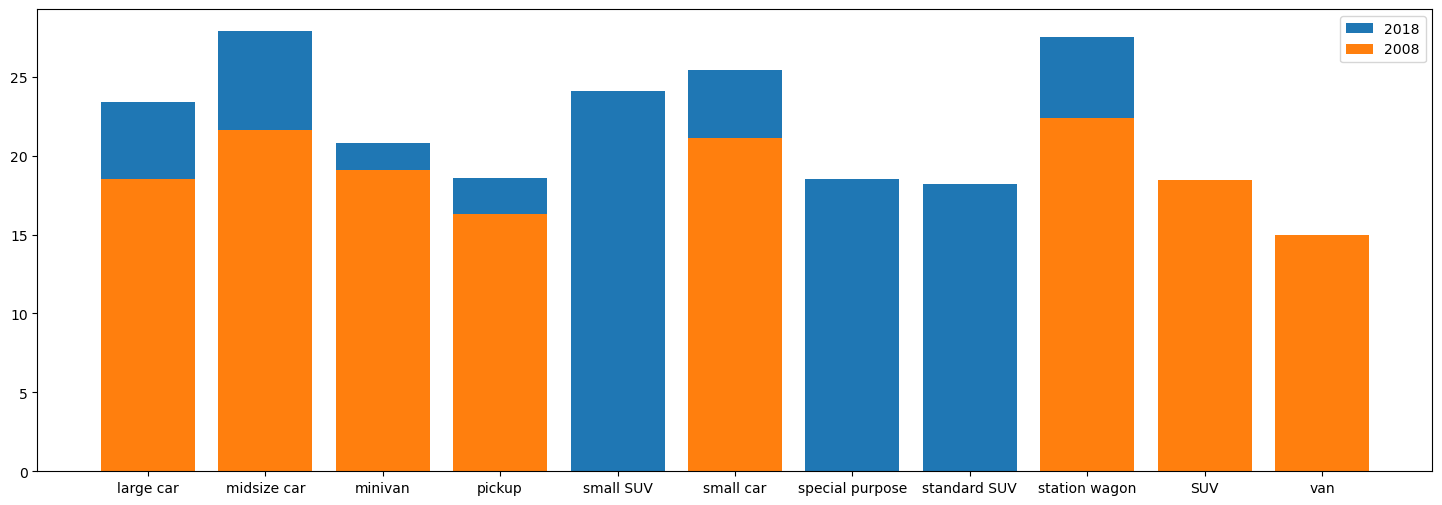

In [11]:
avg_mlg_08=df1.groupby('veh_class')['cmb_mpg'].mean()
avg_mlg_18=df2.groupby('veh_class')['cmb_mpg'].mean()

plt.show()
plt.figure(figsize=(18,6))
plt.bar(x=avg_mlg_18.index,height=avg_mlg_18,label='2018')

plt.bar(x=avg_mlg_08.index,height=avg_mlg_08,label='2008')
plt.legend()

In [34]:
df08 = pd.read_csv("clean_08.csv")
df18 = pd.read_csv("clean_18.csv")
df08.rename(columns={"cmb_mpg":'cmb_mpg_08','city_mpg':'city_mpg_08','hwy_mpg':'hwy_mpg_08'}, inplace=True)
df_merge = pd.merge(df08,df18, on='model')
df_merge["mpg_differ"]=df_merge['cmb_mpg']-df_merge['cmb_mpg_08']
max_mpg_differ = df_merge['mpg_differ'].max()
df_merge[df_merge['mpg_differ'] == max_mpg_differ]


,model,displ_x,cyl_x,trans_x,drive_x,fuel_x,veh_class_x,air_pollution_score_x,city_mpg_08,hwy_mpg_08,...,drive_y,fuel_y,veh_class_y,air_pollution_score_y,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score_y,smartway_y,mpg_differ
915,VOLVO XC 90,4.4,8,Auto-S6,4WD,Gasoline,SUV,7.0,13.0,19.0,...,4WD,Electricity,standard SUV,7.0,63.0,61.0,62.0,10,Elite,47.0


([<matplotlib.axis.XTick at 0x7f51cab3b150>,
 [Text(-10, 0, '−10'),
  Text(-5, 0, '−5'),
  Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20'),
  Text(25, 0, '25'),
  Text(30, 0, '30'),
  Text(35, 0, '35'),
  Text(40, 0, '40'),
  Text(45, 0, '45')])

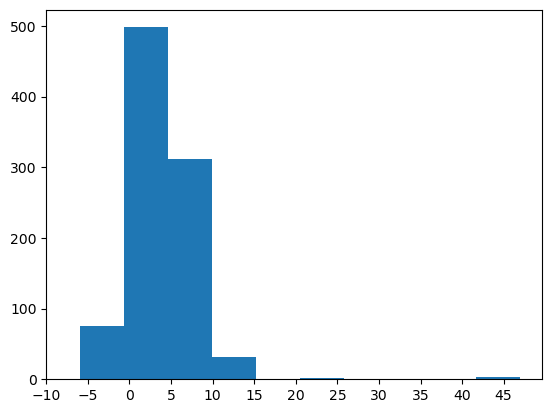

In [39]:


#df_merge['mpg_differ'].hist()
plt.hist(df_merge['mpg_differ'])
plt.xticks(range(-10,50,5))

